<a href="https://colab.research.google.com/github/nayak-ankita/house-price-prediction/blob/main/SCT_ML_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load Dataset

In [2]:
# Load the dataset
data = pd.read_csv("/content/Housing.csv")

# Display first 5 rows
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# Select Features and Target

In [4]:
# Features: area, bedrooms, bathrooms
X = data[['area', 'bedrooms', 'bathrooms']]

# Target: price
y = data['price']

# Split Data into Train and Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions

In [7]:
y_pred = model.predict(X_test)

# Evaluate Model

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 2750040479309.0522
R² Score: 0.4559299118872445


# Check Model Coefficients

In [10]:
print(f"Intercept (Base Price): {model.intercept_:.2f}")
print("Coefficients:")
print(f"  Square Footage: {model.coef_[0]:.2f}")
print(f"  Bedrooms: {model.coef_[1]:.2f}")
print(f"  Bathrooms: {model.coef_[2]:.2f}")


Intercept (Base Price): 59485.38
Coefficients:
  Square Footage: 345.47
  Bedrooms: 360197.65
  Bathrooms: 1422319.66


# Visualize Predictions

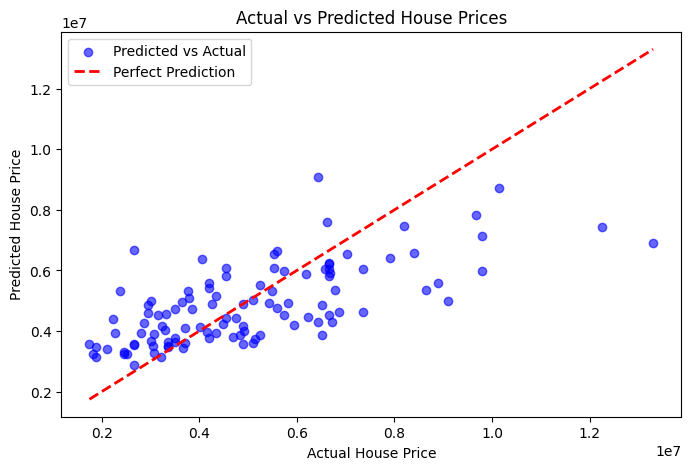

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()
